In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ML/Datasets/Text/dataset.csv")
df = df.dropna(axis = 0)
df.shape

(28015, 2)

In [5]:
df.head()

,category,text
0,Благоустройство территории,На трассе Нижнекамск-Чистополь в лесополосе у ...
1,Благоустройство территории,Во дворе дома Ленинградская 29 отсутствуют пар...
2,Содержание и ремонт муниципальных дорог,Добрый день! Не осуществляется уборка снега в ...
3,Благоустройство территории,Добрый день! Не осуществляется вывоз мусора с ...
4,Содержание и ремонт муниципальных дорог,на данном участке проезжей части от ул.Халитов...


In [6]:
df.text[200]

'Около детского сада месиво, ребенка невозможно провезти даже на салазках'

In [7]:
df['text'][10]

'Не убирают снег на тротуаре. Точнее при уборке дороги, весь снег с дороги расположили на тротуаре. Нужно очистить тротуар, для передвижения пешеходов.'

In [8]:
df['category'].nunique()

36

In [9]:
df['category'].value_counts()

Благоустройство территории                                                              12967
Содержание и ремонт муниципальных дорог                                                  6948
Нарушение в наружной рекламе                                                             2079
Организация дорожного движения                                                           2040
Общественный транспорт                                                                    936
Бездомные животные                                                                        726
Поликлиники и больницы                                                                    524
Парки и скверы                                                                            406
Cвалки                                                                                    335
Мобильная связь                                                                           200
Воздух                                                      

In [10]:
q1 = df.category.value_counts()[df.category.value_counts() < 25].index

In [11]:
df.category = df.category.replace(q1, 'Разное')

In [12]:
df['category'].value_counts()

Благоустройство территории                                 12967
Содержание и ремонт муниципальных дорог                     6948
Нарушение в наружной рекламе                                2079
Организация дорожного движения                              2040
Общественный транспорт                                       936
Бездомные животные                                           726
Поликлиники и больницы                                       524
Парки и скверы                                               406
Cвалки                                                       335
Мобильная связь                                              200
Воздух                                                       142
Капитальный ремонт                                           127
Детские сады                                                 126
Разное                                                       119
Санитарное состояние                                          91
Доступная среда          

# Предварительная обработка текста

In [13]:
!pip install pymorphy2

In [14]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Удаление стоп-слов

In [15]:
all_stopwords = stopwords.words("russian")

In [16]:
q2 = "Саша и Маша"

In [17]:
list1 = []
for i in q2.split(" "):
  if i not in all_stopwords:
    list1.append(i)

In [18]:
(" ").join(list1)

'Саша Маша'

In [19]:
%%time
list2 = []
for j in df.text:
  list1 = []
  for i in j.split(" "):
    if i not in all_stopwords:
      list1.append(i)
  
  list2.append((" ").join(list1))

CPU times: user 1.23 s, sys: 18.1 ms, total: 1.25 s
Wall time: 1.28 s


In [20]:
df.text = list2

Приведение к нижнему регистру и удаление пунктуации

In [22]:
import re

In [23]:
%%time
patterns = "[0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
pattern11 = re.compile(r'\s+')

list2 = []
for j in df.text:
  buff = j.lower()
  buff = re.sub(patterns, '', buff)
  buff = re.sub(pattern11, ' ', buff)
  list2.append(buff)

CPU times: user 408 ms, sys: 11.9 ms, total: 420 ms
Wall time: 422 ms


In [24]:
df.text = list2

In [25]:
df.text[:5]

0    на трассе нижнекамскчистополь лесополосе пгт к...
1    во дворе дома ленинградская отсутствуют парков...
2    добрый день не осуществляется уборка снега цен...
3    добрый день не осуществляется вывоз мусора тер...
4    данном участке проезжей части улхалитова дома ...
Name: text, dtype: object

# Остальное

In [26]:
from nltk.stem.snowball import SnowballStemmer

In [27]:
stemmer = SnowballStemmer("russian")
def stm(doc):
    tokens = []
    for token in doc.split():
      token = stemmer.stem(token)
      tokens.append(token)
    if len(tokens) > 0:
        return (" ").join(tokens)
    return None

In [28]:
df.text = df.text.apply(stm)

# Векторизация

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [36]:
df.head()

,category,text
0,Благоустройство территории,на трасс нижнекамскчистопол лесополос пгт камс...
1,Благоустройство территории,во двор дом ленинградск отсутств парковочн мес...
2,Содержание и ремонт муниципальных дорог,добр ден не осуществля уборк снег центр город ...
3,Благоустройство территории,добр ден не осуществля вывоз мусор территор жи...
4,Содержание и ремонт муниципальных дорог,дан участк проезж част улхалитов дом № улхалит...


In [37]:
X = df.text
y = df.category

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y)
X_train = X_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [40]:
vectorizer = TfidfVectorizer(max_features = 10000)

In [41]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score

In [45]:
%%time
model_SVC = SVC(C = 1, kernel = 'linear')
model_SVC.fit(X_train, y_train)
res = model_SVC.predict(X_test)

CPU times: user 1min, sys: 357 ms, total: 1min
Wall time: 1min


In [49]:
f1_svm = f1_score(y_test, res, average='macro')
f1_svm

0.5901719014139908

In [46]:
print(classification_report(y_test, res))

                                                         precision    recall  f1-score   support

                                                 Cвалки       0.79      0.39      0.52        67
                                     Бездомные животные       0.97      0.94      0.96       145
                             Благоустройство территории       0.81      0.87      0.84      2593
                                                   Вода       0.00      0.00      0.00         5
                                                 Воздух       0.96      0.79      0.86        28
                                           Детские сады       0.88      0.28      0.42        25
                                        Доступная среда       0.89      0.50      0.64        16
                                 Жилищное строительство       0.00      0.00      0.00         7
                                     Капитальный ремонт       0.79      0.42      0.55        26
                             

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
%%time
model_SVC = RandomForestClassifier()
model_SVC.fit(X_train, y_train)
res = model_SVC.predict(X_test)

CPU times: user 45.1 s, sys: 158 ms, total: 45.2 s
Wall time: 45 s


In [52]:
f1_rf = f1_score(y_test, res, average='macro')
f1_rf

0.5272932400650985

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
%%time
model_SVC = KNeighborsClassifier()
model_SVC.fit(X_train, y_train)
res = model_SVC.predict(X_test)

CPU times: user 2.96 s, sys: 1.05 s, total: 4.01 s
Wall time: 4.02 s


In [56]:
f1_knn = f1_score(y_test, res, average='macro')
f1_knn

0.1855986463938764

# Рисуем

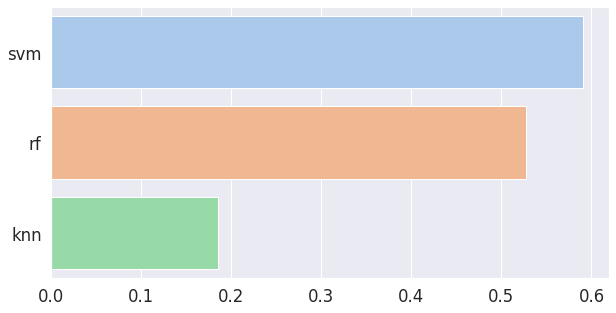

In [57]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(y = ['svm', 'rf', 'knn'], x = [f1_svm, f1_rf, f1_knn], palette = 'pastel', orient = 'h');